# Preprocessing

In [ ]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## File upload

In [ ]:
#Repositório do experimento: "Google Drive"
#Diretório: "Projeto_Vacina"
uploaded = files.upload() #Arquivo usado no experimento: "output_file.csv"
path = list(uploaded.keys())[0]
uploaded_df = pd.read_csv(io.BytesIO(uploaded[path]))

Saving output_file.csv to output_file.csv


In [ ]:
df = uploaded_df.copy()

In [ ]:
df.head()

,Unnamed: 0,IDADE,FXIDADE,SEXO,ALFABETIZACAO,ESCOLARIDADE,P1A01,P1A02,P1A03,P1A04,...,P10C06,RELIGIAO,REND1,REND2,REG,COND,PORTE,SbjNum,TIPO_COLETA,DATA_ENTREVISTA
0,0,42.0,35 a 44,FEM,SIM,5ª série (ou 6º ano),Poderia votar nele(a) para Presidente da Repúb...,Poderia votar nele(a) para Presidente da Repúb...,Poderia votar nele(a) para Presidente da Repúb...,Poderia votar nele(a) para Presidente da Repúb...,...,Discorda totalmente,Católica Apostólica Romana,ATÉ 1,MAIS DE 1 A 2,SUDESTE,INTERIOR,MAIS DE 500.000,141751867.0,Face a face/Presencial,2021-02-19
1,1,23.0,18 a 24,MAS,SIM,Superior incompleto,Poderia votar nele(a) para Presidente da Repúb...,Com certeza votaria nele(a) para Presidente da...,Com certeza votaria nele(a) para Presidente da...,Não votaria nele(a) de jeito nenhum para Presi...,...,Discorda totalmente,É religioso mas não segue nenhuma/ Agnóstico,ATÉ 1,MAIS DE 2 A 5,NORDESTE,INTERIOR,DE 20.001 A 50.000,141752146.0,Face a face/Presencial,2021-02-19
2,2,59.0,55 a 64,FEM,SIM,3ª série,Poderia votar nele(a) para Presidente da Repúb...,Não votaria nele(a) de jeito nenhum para Presi...,Poderia votar nele(a) para Presidente da Repúb...,Não o(a) conhece o suficiente para opinar,...,Não sabe/ Não respondeu,Católica Apostólica Romana,NÃO TEM RENDIMENTO PESSOAL,MAIS DE 1 A 2,SUDESTE,INTERIOR,MAIS DE 500.000,141752835.0,Face a face/Presencial,2021-02-19
3,3,62.0,55 a 64,FEM,SIM,8ª série (ou 9º ano),Não votaria nele(a) de jeito nenhum para Presi...,Não o(a) conhece o suficiente para opinar,Não votaria nele(a) de jeito nenhum para Presi...,Poderia votar nele(a) para Presidente da Repúb...,...,Não sabe/ Não respondeu,Assembléia de Deus,ATÉ 1,ATÉ 1,NORDESTE,INTERIOR,DE 10.001 A 20.000,141753313.0,Face a face/Presencial,2021-02-19
4,4,34.0,25 a 34,FEM,SIM,Superior completo,Com certeza votaria nele(a) para Presidente da...,Poderia votar nele(a) para Presidente da Repúb...,Não votaria nele(a) de jeito nenhum para Presi...,Poderia votar nele(a) para Presidente da Repúb...,...,Discorda totalmente,Católica Apostólica Romana,MAIS DE 1 A 2,MAIS DE 1 A 2,NORDESTE,INTERIOR,DE 20.001 A 50.000,141753314.0,Face a face/Presencial,2021-02-19


## Column drop

In [ ]:
df.drop(columns=['FXIDADE','P2A','P1B','P2B01','P2B02','P2B03','P3B01','P3B02',
                 'P3B03','P1C01','P1C02','P1C03','P1C04','P1C05','P1C06',
                 'P1C07','P2C01', 'P2C02', 'P2C03', 'P2C04', 'P2C05',
                 'P3C01', 'P3C02','P3C03', 'P3C04','P4C01', 'P4C02',
                 'P5C01', 'P5C02', 'P5C03', 'P5C04','P5C05',
                 'P6C01', 'P6C02', 'P6C03', 'P6C04', 'P6C05', 'P6C06', 'P6C07',
                 'P7C01', 'P7C02', 'P7C03', 'P7C04', 'P7C05','P8C01',
                 'P8C02', 'P8C03', 'P8C04', 'P8C05', 'P8C06','P9C03','P10C01',
                 'COND', 'PORTE', 'SbjNum', 'TIPO_COLETA','DATA_ENTREVISTA'], inplace=True)

## Data wrangling

In [ ]:
df['FXIDADE'] = pd.qcut(x=df['IDADE'], q=[0, .25, .5, .75, 1.], labels=['16_A_28','29_A_41','42_A_54','54_MAIS'])
df['FXIDADE'].value_counts()

16_A_28    512
29_A_41    509
42_A_54    501
54_MAIS    480
Name: FXIDADE, dtype: int64

In [ ]:
df['ESCOLARIDADE'].value_counts()

3ª série                                     600
Superior completo                            258
Superior incompleto                          185
4ª série (ou 5º ano)                         183
8ª série (ou 9º ano)                         180
5ª série (ou 6º ano)                          96
1ª série                                      94
2ª série                                      87
3ª série (ou 4º ano)                          72
Analfabeto                                    68
7ª série (ou 8º ano)                          58
6ª série (ou 7º ano)                          55
1ª série (ou 2º ano)                          33
2ª série (ou 3º ano)                          25
Sabe ler/ escrever, mas não cursou escola      7
Pré-escola (ou 1º ano)                         1
Name: ESCOLARIDADE, dtype: int64

In [ ]:
escolaridade_mapping = {'Analfabeto':'ANALFABETO',
              'Sabe ler/ escrever, mas não cursou escola':'ANALFABETO',
              'Pré-escola (ou 1º ano)':'ANALFABETO',
              '1ª série':'FUNDAMENTAL_1',
              '1ª série (ou 2º ano)':'FUNDAMENTAL_1',
              '2ª série':'FUNDAMENTAL_1',
              '2ª série (ou 3º ano)':'FUNDAMENTAL_1',
              '3ª série':'FUNDAMENTAL_1',
              '3ª série (ou 4º ano)':'FUNDAMENTAL_1',
              '4ª série (ou 5º ano)':'FUNDAMENTAL_1',
              '5ª série (ou 6º ano)':'FUNDAMENTAL_2',
              '6ª série (ou 7º ano)':'FUNDAMENTAL_2',
              '7ª série (ou 8º ano)':'FUNDAMENTAL_2',
              '8ª série (ou 9º ano)':'FUNDAMENTAL_2',
              'Superior incompleto':'SUPERIOR_INCOMPLETO',
              'Superior completo':'SUPERIOR_COMPLETO'}

df['ESCOLARIDADE'] = df['ESCOLARIDADE'].map(escolaridade_mapping)

In [ ]:
df['P1A01'].value_counts()

Não votaria nele(a) de jeito nenhum para Presidente da República    1053
Não o(a) conhece o suficiente para opinar                            396
Poderia votar nele(a) para Presidente da República                   347
Com certeza votaria nele(a) para Presidente da República             158
Não sabe/ Não respondeu                                               48
Name: P1A01, dtype: int64

In [ ]:
p1_mapping = {'Não votaria nele(a) de jeito nenhum para Presidente da República':0,
              'Não o(a) conhece o suficiente para opinar':0,
              'Não sabe/ Não respondeu':0,
              'Poderia votar nele(a) para Presidente da República':1,
              'Com certeza votaria nele(a) para Presidente da República':1}

p1_columns = ['P1A01','P1A02', 'P1A03', 'P1A04', 'P1A05', 'P1A06', 'P1A07', 'P1A08', 'P1A09','P1A10']

for column in p1_columns:
  df[column] = df[column].map(p1_mapping)

In [ ]:
df['P9C01'].value_counts()

Concorda totalmente                  998
Concorda em parte                    381
Discorda totalmente                  287
Discorda em parte                    234
Não concorda, nem discorda (Esp.)     56
Não sabe/ Não respondeu               46
Name: P9C01, dtype: int64

In [ ]:
p9c01_mapping = {'Não sabe/ Não respondeu':0,
              'Não concorda, nem discorda (Esp.)':0,
              'Discorda totalmente':0,
              'Discorda em parte':0,
              'Concorda em parte':1,
              'Concorda totalmente':1}

df['P9C01'] = df['P9C01'].map(p9c01_mapping)

In [ ]:
df['P9C02'].value_counts() # variavel Y

Concorda totalmente                  1428
Discorda totalmente                   267
Concorda em parte                     160
Discorda em parte                      92
Não concorda, nem discorda (Esp.)      30
Não sabe/ Não respondeu                25
Name: P9C02, dtype: int64

In [ ]:
p9c02_mapping = {'Não sabe/ Não respondeu':0,
             'Não concorda, nem discorda (Esp.)':0,
             'Discorda totalmente':0,
             'Discorda em parte':0,
             'Concorda em parte':0,
             'Concorda totalmente':1} # pro-vac

df['P9C02'] = df['P9C02'].map(p9c02_mapping)

In [ ]:
df['P3A'].value_counts()

Desaprova                  1153
Aprova                      753
Não sabe/ Não respondeu      96
Name: P3A, dtype: int64

In [ ]:
p3_mapping = {'Não sabe/ Não respondeu':0,
              'Desaprova':0,
              'Aprova':1}

df['P3A'] = df['P3A'].map(p3_mapping)

In [ ]:
df['P4A'].value_counts()

Não confia                 1213
Confia                      719
Não sabe/ Não respondeu      70
Name: P4A, dtype: int64

In [ ]:
p4_mapping = {'Não sabe/ Não respondeu':0,
              'Não confia':0,
              'Confia':1}

df['P4A'] = df['P4A'].map(p4_mapping)

In [ ]:
df['P10C02'].value_counts()

Discorda totalmente                  1108
Concorda totalmente                   351
Discorda em parte                     218
Concorda em parte                     165
Não sabe/ Não respondeu               130
Não concorda, nem discorda (Esp.)      30
Name: P10C02, dtype: int64

In [ ]:
p10_mapping = {'Não sabe/ Não respondeu':0,
              'Não concorda, nem discorda (Esp.)':0,
              'Discorda totalmente':0,
              'Discorda em parte':0,
              'Concorda em parte':1,
              'Concorda totalmente':1}

p10_columns = ['P10C02','P10C03','P10C04','P10C05','P10C06']

for column in p10_columns:
  df[column] = df[column].map(p10_mapping)

In [ ]:
df['REND1'].value_counts()

ATÉ 1                         902
MAIS DE 1 A 2                 461
NÃO TEM RENDIMENTO PESSOAL    263
MAIS DE 2 A 5                 224
NÃO RESPONDEU                  86
MAIS DE 5 A 10                 48
MAIS DE 10 A 20                17
MAIS DE 20                      1
Name: REND1, dtype: int64

In [ ]:
df['REND2'].value_counts()

ATÉ 1              669
MAIS DE 1 A 2      563
MAIS DE 2 A 5      452
NÃO RESPONDEU      154
MAIS DE 5 A 10     126
MAIS DE 10 A 20     32
MAIS DE 20           6
Name: REND2, dtype: int64

In [ ]:
rend_mapping = {'NÃO TEM RENDIMENTO PESSOAL':'SEM_RENDA_PESSOAL',
              'ATÉ 1':'ATE_1',
              'MAIS DE 1 A 2':'1_A_2',
              'MAIS DE 2 A 5':'2_A_5',
              'MAIS DE 5 A 10':'5_MAIS',
              'MAIS DE 10 A 20':'5_MAIS',
              'MAIS DE 20':'5_MAIS',
              'NÃO RESPONDEU': 'N/A'}

rend_columns = ['REND1','REND2']

for column in rend_columns:
  df[column] = df[column].map(rend_mapping)

In [ ]:
df['REG'].value_counts()

SUDESTE                882
NORDESTE               518
NORTE/ CENTRO OESTE    308
SUL                    294
Name: REG, dtype: int64

In [ ]:
reg_mapping = {'NORTE/ CENTRO OESTE':'NORTE_CENTRO_OESTE',
               'SUDESTE':'SUDESTE',
               'NORDESTE':'NORDESTE',
               'SUL':'SUL'}

df['REG'] = df['REG'].map(reg_mapping)

In [ ]:
df['RELIGIAO'].value_counts()

Católica Apostólica Romana                      1064
Assembléia de Deus                               163
Ateu, não tem religião                           154
Outras Evangélicas específicas                   135
Evangélica - Não sabe especificar                115
É religioso mas não segue nenhuma/ Agnóstico      89
Batista/ Metodista/ Presbiteriana                 68
Espírita/ Kardecista                              49
Evangelho Quadrangular                            27
Afro-Brasileiras (Umbanda, Candomblé, etc)        25
Universal do Reino de Deus                        24
Não respondeu                                     21
Outras religiões                                  17
Testemunha de Jeová                               14
Adventista                                        14
Deus é Amor                                       12
Igreja Internacional da Graça                      5
Renascer em Cristo                                 3
Orientais (Budismo, Islamismo, etc)           

In [ ]:
religiao_mapping = {'Católica Apostólica Romana':'CATOLICA',
               'Assembléia de Deus':'EVANGELICA',
               'Ateu, não tem religião':'ATEU',
               'Outras Evangélicas específicas':'EVANGELICA',
               'Evangélica - Não sabe especificar':'EVANGELICA',
               'É religioso mas não segue nenhuma/ Agnóstico':'AGNOSTICO',
               'Batista/ Metodista/ Presbiteriana':'EVANGELICA',
               'Espírita/ Kardecista':'ESPIRITA',
               'Evangelho Quadrangular':'EVANGELICA',
               'Afro-Brasileiras (Umbanda, Candomblé, etc)':'AFRO_BRASILEIRAS',
               'Universal do Reino de Deus':'EVANGELICA',
               'Não respondeu':'N/A',
               'Outras religiões':'OUTRAS',
               'Adventista':'EVANGELICA',
               'Testemunha de Jeová':'OUTRAS',
               'Deus é Amor':'EVANGELICA',
               'Igreja Internacional da Graça':'EVANGELICA',
               'Renascer em Cristo':'EVANGELICA',
               'Orientais (Budismo, Islamismo, etc)':'OUTRAS',
               'Sara nossa terra':'EVANGELICA'}

df['RELIGIAO'] = df['RELIGIAO'].map(religiao_mapping)

## Dataframe backup

In [ ]:
df_tratado = df.copy()
df_renomeado = df.copy()

## Dataframe column rename

In [ ]:
# renomear as colunas
column_names = {'REND1':'RENDA_PESSOAL',
              'REND2':'RENDA_FAMILIAR',
              'P1A01':'VOTO_CIRO',
              'P1A02':'VOTO_HADDAD',
              'P1A03':'VOTO_LULA',
              'P1A04':'VOTO_HUCK',
              'P1A05':'VOTO_BOLSONARO',
              'P1A06':'VOTO_DORIA',
              'P1A07':'VOTO_MORO',
              'P1A08':'VOTO_MANDETTA',
              'P1A09':'VOTO_BOULOS',
              'P1A10':'VOTO_MARINA',
              'P3A':'APROVA_GOVERNO',
              'P4A':'CONFIA_BOLSONARO',
              'P9C01':'VACINA_SEGURA',
              'P9C02':'VAI_VACINAR', # target
              'P10C02':'TRAT_MAIS_EFIC',
              'P10C03':'MUDA_DNA',
              'P10C04':'MICROCHIP',
              'P10C05':'CANCER_AUT_HIV',
              'P10C06':'ABORTADOS_E_TUMORES'}

df_renomeado.rename(columns=column_names, inplace=True)

## Dataframe split

In [ ]:
df_perfil = df_renomeado[['IDADE', 'FXIDADE', 'SEXO', 'ALFABETIZACAO', 'ESCOLARIDADE','RELIGIAO', 'RENDA_PESSOAL','RENDA_FAMILIAR', 'REG', 'VAI_VACINAR']]
df_ideologia = df_renomeado[['VOTO_CIRO', 'VOTO_HADDAD', 'VOTO_LULA', 'VOTO_HUCK', 'VOTO_BOLSONARO','VOTO_DORIA', 'VOTO_MORO', 'VOTO_MANDETTA', 'VOTO_BOULOS','VOTO_MARINA','VAI_VACINAR']]
df_avaliacao_governo = df_renomeado[['APROVA_GOVERNO', 'CONFIA_BOLSONARO','VAI_VACINAR']]
df_opiniao_vacina = df_renomeado[['VACINA_SEGURA','TRAT_MAIS_EFIC', 'MUDA_DNA', 'MICROCHIP','CANCER_AUT_HIV', 'ABORTADOS_E_TUMORES','VAI_VACINAR']]

## Dataframe dummies



In [ ]:
df_renomeado_dummies = df_renomeado.copy()
df_renomeado_dummies = pd.get_dummies(df_renomeado_dummies, columns=["FXIDADE"], prefix=["FXIDADE"], drop_first=True)
df_renomeado_dummies = pd.get_dummies(df_renomeado_dummies, columns=["SEXO"], prefix=["SEXO"], drop_first=True)
df_renomeado_dummies = pd.get_dummies(df_renomeado_dummies, columns=["ALFABETIZACAO"], prefix=["ALFABETIZACAO"], drop_first=True)
df_renomeado_dummies = pd.get_dummies(df_renomeado_dummies, columns=["ESCOLARIDADE"], prefix=["ESCOLARIDADE"], drop_first=True)
df_renomeado_dummies = pd.get_dummies(df_renomeado_dummies, columns=["RELIGIAO"], prefix=["RELIGIAO"], drop_first=True)
df_renomeado_dummies = pd.get_dummies(df_renomeado_dummies, columns=["RENDA_PESSOAL"], prefix=["RENDA_PESSOAL"], drop_first=True)
df_renomeado_dummies = pd.get_dummies(df_renomeado_dummies, columns=["RENDA_FAMILIAR"], prefix=["RENDA_FAMILIAR"], drop_first=True)
df_renomeado_dummies = pd.get_dummies(df_renomeado_dummies, columns=["REG"], prefix=["REG"], drop_first=True)
df_renomeado_dummies

,Unnamed: 0,IDADE,VOTO_CIRO,VOTO_HADDAD,VOTO_LULA,VOTO_HUCK,VOTO_BOLSONARO,VOTO_DORIA,VOTO_MORO,VOTO_MANDETTA,...,RENDA_PESSOAL_ATE_1,RENDA_PESSOAL_N/A,RENDA_PESSOAL_SEM_RENDA_PESSOAL,RENDA_FAMILIAR_2_A_5,RENDA_FAMILIAR_5_MAIS,RENDA_FAMILIAR_ATE_1,RENDA_FAMILIAR_N/A,REG_NORTE_CENTRO_OESTE,REG_SUDESTE,REG_SUL
0,0,42.0,1,1,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,23.0,1,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2,59.0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3,62.0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4,34.0,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1997,52.0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
1998,1998,52.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1999,1999,53.0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2000,2000,23.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_perfil_dummies = df_perfil.copy()
df_perfil_dummies = pd.get_dummies(df_perfil_dummies, columns=["FXIDADE"], prefix=["FXIDADE"], drop_first=True)
df_perfil_dummies = pd.get_dummies(df_perfil_dummies, columns=["SEXO"], prefix=["SEXO"], drop_first=True)
df_perfil_dummies = pd.get_dummies(df_perfil_dummies, columns=["ALFABETIZACAO"], prefix=["ALFABETIZACAO"], drop_first=True)
df_perfil_dummies = pd.get_dummies(df_perfil_dummies, columns=["ESCOLARIDADE"], prefix=["ESCOLARIDADE"], drop_first=True)
df_perfil_dummies = pd.get_dummies(df_perfil_dummies, columns=["RELIGIAO"], prefix=["RELIGIAO"], drop_first=True)
df_perfil_dummies = pd.get_dummies(df_perfil_dummies, columns=["RENDA_PESSOAL"], prefix=["RENDA_PESSOAL"], drop_first=True)
df_perfil_dummies = pd.get_dummies(df_perfil_dummies, columns=["RENDA_FAMILIAR"], prefix=["RENDA_FAMILIAR"], drop_first=True)
df_perfil_dummies = pd.get_dummies(df_perfil_dummies, columns=["REG"], prefix=["REG"], drop_first=True)
df_perfil_dummies

,IDADE,VAI_VACINAR,FXIDADE_29_A_41,FXIDADE_42_A_54,FXIDADE_54_MAIS,SEXO_MAS,ALFABETIZACAO_SIM,ESCOLARIDADE_FUNDAMENTAL_1,ESCOLARIDADE_FUNDAMENTAL_2,ESCOLARIDADE_SUPERIOR_COMPLETO,...,RENDA_PESSOAL_ATE_1,RENDA_PESSOAL_N/A,RENDA_PESSOAL_SEM_RENDA_PESSOAL,RENDA_FAMILIAR_2_A_5,RENDA_FAMILIAR_5_MAIS,RENDA_FAMILIAR_ATE_1,RENDA_FAMILIAR_N/A,REG_NORTE_CENTRO_OESTE,REG_SUDESTE,REG_SUL
0,42.0,1,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,23.0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,59.0,1,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,62.0,1,0,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,34.0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,52.0,0,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1998,52.0,1,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1999,53.0,0,0,1,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2000,23.0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# Feature selection

## OLS Regression

### df_perfil

### df_ideologia

### df_avaliacao_governo

### df_opiniao_vacina

## WoE Analysis

In [ ]:
# adiciona uma coluna apenas para fazer um count
frames = [df_perfil, df_ideologia, df_avaliacao_governo, df_opiniao_vacina]

for frame in frames:
  frame['frequency'] = 1

### df_perfil

In [ ]:
df_perfil_woe = pd.DataFrame(columns=['Variable', 'Value', 'X Frequency', 'Y Frequency', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV'])

# variables = df_perfil.columns.to_list()
# variables.remove('frequency')
# variables.remove('VAI_VACINAR')
variables = ['FXIDADE', 'SEXO', 'ESCOLARIDADE', 'RELIGIAO', 'RENDA_PESSOAL', 'REG','RENDA_FAMILIAR']

for var in variables:
    aux = df_perfil.groupby(by=var,as_index=False).agg({'frequency':'count','VAI_VACINAR':'sum'})
    x_frequency = aux['frequency'].sum()
    y_frequency = aux['VAI_VACINAR'].sum()
    not_y_frequency = x_frequency - y_frequency
    aux['Rate'] = aux['VAI_VACINAR'] / aux['frequency']
    aux['% X'] = aux['frequency']/x_frequency
    aux['% Y'] = aux['VAI_VACINAR']/y_frequency
    aux['% Not Y'] = (aux['frequency'] - aux['VAI_VACINAR'])/not_y_frequency
    aux['Risk Ratio'] = aux['% Y'] / aux['% Not Y']
    aux['WoE'] = np.log(aux['Risk Ratio'])
    aux['IV'] = ((1-aux['Rate']) - aux['Rate']) * aux['WoE']
    aux['Variable'] = var
    column_names = ['Variable', 'frequency', 'VAI_VACINAR', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
    column_names.insert(1,var)
    aux = aux[column_names]
    aux.columns = ['Variable', 'Value', 'X Frequency', 'Y Frequency', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
    df_perfil_woe = df_perfil_woe.append(aux, ignore_index=True)

df_perfil_woe.sort_values(by=['Variable', 'WoE'], ascending=[True, False]).reset_index(drop=True)

cols_aux = df_perfil_woe["Variable"].drop_duplicates()

for i in cols_aux:
  display(df_perfil_woe.query("Variable=='{}'".format(i)).sort_values(by=['Variable', 'WoE'], ascending=[True, False]))

,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
3,FXIDADE,54_MAIS,480,371,0.772917,0.239760,0.259804,0.189895,1.368142,0.313453,-0.171093
2,FXIDADE,42_A_54,501,373,0.744511,0.250250,0.261204,0.222997,1.171339,0.158147,-0.077338
1,FXIDADE,29_A_41,509,355,0.697446,0.254246,0.248599,0.268293,0.926598,-0.076236,0.030105
0,FXIDADE,16_A_28,512,329,0.642578,0.255744,0.230392,0.318815,0.722651,-0.324829,0.092627


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
4,SEXO,FEM,1051,761,0.724072,0.524975,0.532913,0.505226,1.054801,0.053352,-0.023909
5,SEXO,MAS,951,667,0.701367,0.475025,0.467087,0.494774,0.944042,-0.057585,0.023191


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
6,ESCOLARIDADE,ANALFABETO,76,60,0.789474,0.037962,0.042017,0.027875,1.507353,0.410355,-0.237574
9,ESCOLARIDADE,SUPERIOR_COMPLETO,258,200,0.775194,0.128871,0.140056,0.101045,1.386072,0.326474,-0.179687
7,ESCOLARIDADE,FUNDAMENTAL_1,1094,774,0.707495,0.546454,0.542017,0.557491,0.972243,-0.028150,0.011682
10,ESCOLARIDADE,SUPERIOR_INCOMPLETO,185,130,0.702703,0.092408,0.091036,0.095819,0.950089,-0.051199,0.020757
8,ESCOLARIDADE,FUNDAMENTAL_2,389,264,0.678663,0.194306,0.184874,0.217770,0.848941,-0.163765,0.058518


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
15,RELIGIAO,ESPIRITA,49,43,0.877551,0.024476,0.030112,0.010453,2.880719,1.058040,-0.798928
11,RELIGIAO,AFRO_BRASILEIRAS,25,21,0.840000,0.012488,0.014706,0.006969,2.110294,0.746827,-0.507843
18,RELIGIAO,OUTRAS,33,26,0.787879,0.016484,0.018207,0.012195,1.492997,0.400786,-0.230755
14,RELIGIAO,CATOLICA,1064,829,0.779135,0.531469,0.580532,0.409408,1.417981,0.349234,-0.194967
17,RELIGIAO,N/A,21,14,0.666667,0.010490,0.009804,0.012195,0.803922,-0.218254,0.072751
12,RELIGIAO,AGNOSTICO,89,59,0.662921,0.044456,0.041317,0.052265,0.790523,-0.235061,0.076593
13,RELIGIAO,ATEU,154,98,0.636364,0.076923,0.068627,0.097561,0.703431,-0.351785,0.095941
16,RELIGIAO,EVANGELICA,567,338,0.596120,0.283217,0.236695,0.398955,0.593287,-0.522077,0.100364


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
21,RENDA_PESSOAL,5_MAIS,66,51,0.772727,0.032967,0.035714,0.026132,1.366667,0.312375,-0.170386
20,RENDA_PESSOAL,2_A_5,224,169,0.754464,0.111888,0.118347,0.095819,1.235116,0.211165,-0.107468
19,RENDA_PESSOAL,1_A_2,461,335,0.726681,0.230270,0.234594,0.219512,1.068705,0.066448,-0.030125
22,RENDA_PESSOAL,ATE_1,902,632,0.700665,0.450549,0.442577,0.470383,0.940886,-0.060933,0.024454
24,RENDA_PESSOAL,SEM_RENDA_PESSOAL,263,182,0.692015,0.131369,0.127451,0.141115,0.903171,-0.101843,0.039111
23,RENDA_PESSOAL,N/A,86,59,0.686047,0.042957,0.041317,0.047038,0.878359,-0.129700,0.048261


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
27,REG,SUDESTE,882,651,0.738095,0.440559,0.455882,0.402439,1.132799,0.124691,-0.059377
26,REG,NORTE_CENTRO_OESTE,308,215,0.698052,0.153846,0.150560,0.162021,0.929264,-0.073362,0.029059
25,REG,NORDESTE,518,359,0.693050,0.258741,0.251401,0.277003,0.907572,-0.096983,0.037445
28,REG,SUL,294,203,0.690476,0.146853,0.142157,0.158537,0.896682,-0.109054,0.041544


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
31,RENDA_FAMILIAR,5_MAIS,164,124,0.756098,0.081918,0.086835,0.069686,1.246078,0.220001,-0.112684
29,RENDA_FAMILIAR,1_A_2,563,414,0.735346,0.281219,0.289916,0.259582,1.116857,0.110519,-0.052020
30,RENDA_FAMILIAR,2_A_5,452,325,0.719027,0.225774,0.227591,0.221254,1.028640,0.028237,-0.012369
32,RENDA_FAMILIAR,ATE_1,669,462,0.690583,0.334166,0.323529,0.360627,0.897130,-0.108555,0.041377
33,RENDA_FAMILIAR,N/A,154,103,0.668831,0.076923,0.072129,0.088850,0.811803,-0.208497,0.070402


### df_ideologia

In [ ]:
# df_ideologia
df_ideologia_woe = pd.DataFrame(columns=['Variable', 'Value', 'X Frequency', 'Y Frequency', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV'])

variables = df_ideologia.columns.to_list()
variables.remove('frequency')
variables.remove('VAI_VACINAR')

for var in variables:
    aux = df_ideologia.groupby(by=var,as_index=False).agg({'frequency':'count','VAI_VACINAR':'sum'})
    x_frequency = aux['frequency'].sum()
    y_frequency = aux['VAI_VACINAR'].sum()
    not_y_frequency = x_frequency - y_frequency
    aux['Rate'] = aux['VAI_VACINAR'] / aux['frequency']
    aux['% X'] = aux['frequency']/x_frequency
    aux['% Y'] = aux['VAI_VACINAR']/y_frequency
    aux['% Not Y'] = (aux['frequency'] - aux['VAI_VACINAR'])/not_y_frequency
    aux['Risk Ratio'] = aux['% Y'] / aux['% Not Y']
    aux['WoE'] = np.log(aux['Risk Ratio'])
    aux['IV'] = ((1-aux['Rate']) - aux['Rate']) * aux['WoE']
    aux['Variable'] = var
    column_names = ['Variable', 'frequency', 'VAI_VACINAR', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
    column_names.insert(1,var)
    aux = aux[column_names]
    aux.columns = ['Variable', 'Value', 'X Frequency', 'Y Frequency', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
    df_ideologia_woe = df_ideologia_woe.append(aux, ignore_index=True)

In [ ]:
cols_aux = df_ideologia_woe["Variable"].drop_duplicates()

for i in cols_aux:
  display(df_ideologia_woe.query("Variable=='{}'".format(i)))

,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
0,VOTO_CIRO,0,1497,1024,0.684035,0.747752,0.717087,0.824042,0.870207,-0.139024,0.051171
1,VOTO_CIRO,1,505,404,0.800000,0.252248,0.282913,0.175958,1.607843,0.474894,-0.284936


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
2,VOTO_HADDAD,0,1466,1008,0.687585,0.732268,0.705882,0.797909,0.884665,-0.122546,0.045976
3,VOTO_HADDAD,1,536,420,0.783582,0.267732,0.294118,0.202091,1.455375,0.375264,-0.212836


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
4,VOTO_LULA,0,1006,710,0.705765,0.502498,0.497199,0.515679,0.964163,-0.036495,0.015019
5,VOTO_LULA,1,996,718,0.720884,0.497502,0.502801,0.484321,1.038158,0.037448,-0.016543


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
6,VOTO_HUCK,0,1450,1021,0.704138,0.724276,0.714986,0.747387,0.956648,-0.044320,0.018095
7,VOTO_HUCK,1,552,407,0.737319,0.275724,0.285014,0.252613,1.128262,0.120679,-0.057279


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
8,VOTO_BOLSONARO,0,1237,929,0.751011,0.617882,0.65056,0.536585,1.212408,0.192608,-0.096693
9,VOTO_BOLSONARO,1,765,499,0.652288,0.382118,0.34944,0.463415,0.754054,-0.282291,0.085979


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
10,VOTO_DORIA,0,1694,1188,0.701299,0.846154,0.831933,0.881533,0.943734,-0.057911,0.023315
11,VOTO_DORIA,1,308,240,0.779221,0.153846,0.168067,0.118467,1.418685,0.349730,-0.195304


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
12,VOTO_MORO,0,1389,961,0.691865,0.693806,0.672969,0.745645,0.902533,-0.102550,0.039351
13,VOTO_MORO,1,613,467,0.761827,0.306194,0.327031,0.254355,1.285724,0.251322,-0.131606


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
14,VOTO_MANDETTA,0,1706,1176,0.689332,0.852148,0.823529,0.923345,0.891898,-0.114404,0.043320
15,VOTO_MANDETTA,1,296,252,0.851351,0.147852,0.176471,0.076655,2.302139,0.833839,-0.585941


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
16,VOTO_BOULOS,0,1785,1251,0.700840,0.891608,0.87605,0.930314,0.941672,-0.060098,0.024140
17,VOTO_BOULOS,1,217,177,0.815668,0.108392,0.12395,0.069686,1.778676,0.575870,-0.363567


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
18,VOTO_MARINA,0,1586,1118,0.704918,0.792208,0.782913,0.815331,0.960240,-0.040572,0.016628
19,VOTO_MARINA,1,416,310,0.745192,0.207792,0.217087,0.184669,1.175546,0.161732,-0.079311


In [ ]:
df_ideologia_woe.query('Value==1').sort_values(by='WoE', ascending=False).reset_index(drop=True)

,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
0,VOTO_MANDETTA,1,296,252,0.851351,0.147852,0.176471,0.076655,2.302139,0.833839,-0.585941
1,VOTO_BOULOS,1,217,177,0.815668,0.108392,0.123950,0.069686,1.778676,0.575870,-0.363567
2,VOTO_CIRO,1,505,404,0.800000,0.252248,0.282913,0.175958,1.607843,0.474894,-0.284936
3,VOTO_HADDAD,1,536,420,0.783582,0.267732,0.294118,0.202091,1.455375,0.375264,-0.212836
4,VOTO_DORIA,1,308,240,0.779221,0.153846,0.168067,0.118467,1.418685,0.349730,-0.195304
5,VOTO_MORO,1,613,467,0.761827,0.306194,0.327031,0.254355,1.285724,0.251322,-0.131606
6,VOTO_MARINA,1,416,310,0.745192,0.207792,0.217087,0.184669,1.175546,0.161732,-0.079311
7,VOTO_HUCK,1,552,407,0.737319,0.275724,0.285014,0.252613,1.128262,0.120679,-0.057279
8,VOTO_LULA,1,996,718,0.720884,0.497502,0.502801,0.484321,1.038158,0.037448,-0.016543
9,VOTO_BOLSONARO,1,765,499,0.652288,0.382118,0.349440,0.463415,0.754054,-0.282291,0.085979


### df_avaliacao_governo

In [ ]:
# df_avaliacao_governo
df_avaliacao_governo_woe = pd.DataFrame(columns=['Variable', 'Value', 'X Frequency', 'Y Frequency', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV'])

variables = df_avaliacao_governo.columns.to_list()
variables.remove('frequency')
variables.remove('VAI_VACINAR')

for var in variables:
    aux = df_avaliacao_governo.groupby(by=var,as_index=False).agg({'frequency':'count','VAI_VACINAR':'sum'})
    x_frequency = aux['frequency'].sum()
    y_frequency = aux['VAI_VACINAR'].sum()
    not_y_frequency = x_frequency - y_frequency
    aux['Rate'] = aux['VAI_VACINAR'] / aux['frequency']
    aux['% X'] = aux['frequency']/x_frequency
    aux['% Y'] = aux['VAI_VACINAR']/y_frequency
    aux['% Not Y'] = (aux['frequency'] - aux['VAI_VACINAR'])/not_y_frequency
    aux['Risk Ratio'] = aux['% Y'] / aux['% Not Y']
    aux['WoE'] = np.log(aux['Risk Ratio'])
    aux['IV'] = ((1-aux['Rate']) - aux['Rate']) * aux['WoE']
    aux['Variable'] = var
    column_names = ['Variable', 'frequency', 'VAI_VACINAR', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
    column_names.insert(1,var)
    aux = aux[column_names]
    aux.columns = ['Variable', 'Value', 'X Frequency', 'Y Frequency', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
    df_avaliacao_governo_woe = df_avaliacao_governo_woe.append(aux, ignore_index=True)

cols_aux = df_avaliacao_governo_woe["Variable"].drop_duplicates()

for i in cols_aux:
  display(df_avaliacao_governo_woe.query("Variable=='{}'".format(i)))

,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
0,APROVA_GOVERNO,0,1249,930,0.744596,0.623876,0.651261,0.555749,1.171861,0.158593,-0.077582
1,APROVA_GOVERNO,1,753,498,0.661355,0.376124,0.348739,0.444251,0.785006,-0.242064,0.078116


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
2,CONFIA_BOLSONARO,0,1283,953,0.74279,0.640859,0.667367,0.574913,1.160814,0.149122,-0.072411
3,CONFIA_BOLSONARO,1,719,475,0.66064,0.359141,0.332633,0.425087,0.782506,-0.245254,0.078795


### df_opiniao_vacina

In [ ]:
# df_opiniao_vacina
df_opiniao_vacina_woe = pd.DataFrame(columns=['Variable', 'Value', 'X Frequency', 'Y Frequency', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV'])

variables = df_opiniao_vacina.columns.to_list()
variables.remove('frequency')
variables.remove('VAI_VACINAR')

for var in variables:
    aux = df_opiniao_vacina.groupby(by=var,as_index=False).agg({'frequency':'count','VAI_VACINAR':'sum'})
    x_frequency = aux['frequency'].sum()
    y_frequency = aux['VAI_VACINAR'].sum()
    not_y_frequency = x_frequency - y_frequency
    aux['Rate'] = aux['VAI_VACINAR'] / aux['frequency']
    aux['% X'] = aux['frequency']/x_frequency
    aux['% Y'] = aux['VAI_VACINAR']/y_frequency
    aux['% Not Y'] = (aux['frequency'] - aux['VAI_VACINAR'])/not_y_frequency
    aux['Risk Ratio'] = aux['% Y'] / aux['% Not Y']
    aux['WoE'] = np.log(aux['Risk Ratio'])
    aux['IV'] = ((1-aux['Rate']) - aux['Rate']) * aux['WoE']
    aux['Variable'] = var
    column_names = ['Variable', 'frequency', 'VAI_VACINAR', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
    column_names.insert(1,var)
    aux = aux[column_names]
    aux.columns = ['Variable', 'Value', 'X Frequency', 'Y Frequency', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
    df_opiniao_vacina_woe = df_opiniao_vacina_woe.append(aux, ignore_index=True)

In [ ]:
cols_aux = df_opiniao_vacina_woe["Variable"].drop_duplicates()

for i in cols_aux:
  display(df_opiniao_vacina_woe.query("Variable=='{}'".format(i)))

,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
0,VACINA_SEGURA,0,623,205,0.329053,0.311189,0.143557,0.728223,0.197134,-1.623872,-0.555192
1,VACINA_SEGURA,1,1379,1223,0.886875,0.688811,0.856443,0.271777,3.151269,1.147805,-0.888113


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
2,TRAT_MAIS_EFIC,0,1486,1119,0.753028,0.742258,0.783613,0.639373,1.225597,0.203428,-0.102946
3,TRAT_MAIS_EFIC,1,516,309,0.598837,0.257742,0.216387,0.360627,0.600028,-0.510778,0.100968


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
4,MUDA_DNA,0,1666,1237,0.742497,0.832168,0.866246,0.747387,1.159034,0.147587,-0.071579
5,MUDA_DNA,1,336,191,0.568452,0.167832,0.133754,0.252613,0.529479,-0.635861,0.087052


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
6,MICROCHIP,0,1812,1323,0.730132,0.905095,0.926471,0.851916,1.087514,0.083894,-0.038613
7,MICROCHIP,1,190,105,0.552632,0.094905,0.073529,0.148084,0.496540,-0.700092,0.073694


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
8,CANCER_AUT_HIV,0,1804,1334,0.739468,0.901099,0.934174,0.818815,1.140884,0.131804,-0.063126
9,CANCER_AUT_HIV,1,198,94,0.474747,0.098901,0.065826,0.181185,0.363311,-1.012497,-0.051136


,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
10,ABORTADOS_E_TUMORES,0,1800,1314,0.730000,0.899101,0.920168,0.84669,1.086783,0.083222,-0.038282
11,ABORTADOS_E_TUMORES,1,202,114,0.564356,0.100899,0.079832,0.15331,0.520722,-0.652539,0.083990


In [ ]:
df_opiniao_vacina_woe.query('Value==0').sort_values(by='WoE', ascending=False).reset_index(drop=True)

,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
0,TRAT_MAIS_EFIC,0,1486,1119,0.753028,0.742258,0.783613,0.639373,1.225597,0.203428,-0.102946
1,MUDA_DNA,0,1666,1237,0.742497,0.832168,0.866246,0.747387,1.159034,0.147587,-0.071579
2,CANCER_AUT_HIV,0,1804,1334,0.739468,0.901099,0.934174,0.818815,1.140884,0.131804,-0.063126
3,MICROCHIP,0,1812,1323,0.730132,0.905095,0.926471,0.851916,1.087514,0.083894,-0.038613
4,ABORTADOS_E_TUMORES,0,1800,1314,0.730000,0.899101,0.920168,0.846690,1.086783,0.083222,-0.038282
5,VACINA_SEGURA,0,623,205,0.329053,0.311189,0.143557,0.728223,0.197134,-1.623872,-0.555192


In [ ]:
esc_mapping = {'ANALFABETO':1,
               'FUNDAMENTAL_1':0,
               'FUNDAMENTAL_2':1,
               'SUPERIOR_COMPLETO':0,
               'SUPERIOR_INCOMPLETO':1}
df_antivac=df_renomeado.copy()
df_antivac['escolaridade_anti_vac'] = df_antivac['ESCOLARIDADE'].map(esc_mapping)

df_antivac['religiao_anti_vac']=[1 if i=='EVANGELICA' else 0 for i in df_antivac["RELIGIAO"]]
df_antivac['idade_anti_vac']=[1 if i<41 else 0 for i in df_antivac["IDADE"]]
df_antivac['renda_anti_vac']=[1 if i=="ATE_1" else 0 for i in df_antivac["RENDA_PESSOAL"]]


df_antivac['anti_vac'] = df_antivac['religiao_anti_vac']*df_antivac["APROVA_GOVERNO"]

df_antivac['frequency']=1

In [ ]:
var="anti_vac"
aux = df_antivac.groupby(by=var,as_index=False).agg({'frequency':'count','VAI_VACINAR':'sum'})
x_frequency = aux['frequency'].sum()
y_frequency = aux['VAI_VACINAR'].sum()
not_y_frequency = x_frequency - y_frequency
aux['Rate'] = aux['VAI_VACINAR'] / aux['frequency']
aux['% X'] = aux['frequency']/x_frequency
aux['% Y'] = aux['VAI_VACINAR']/y_frequency
aux['% Not Y'] = (aux['frequency'] - aux['VAI_VACINAR'])/not_y_frequency
aux['Risk Ratio'] = aux['% Y'] / aux['% Not Y']
aux['WoE'] = np.log(aux['Risk Ratio'])
aux['IV'] = ((1-aux['Rate']) - aux['Rate']) * aux['WoE']
aux['Variable'] = var
column_names = ['Variable', 'frequency', 'VAI_VACINAR', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
column_names.insert(1,var)
aux = aux[column_names]
aux.columns = ['Variable', 'Value', 'X Frequency', 'Y Frequency', 'Rate', '% X', '% Y', '% Not Y', 'Risk Ratio', 'WoE', 'IV']
aux

,Variable,Value,X Frequency,Y Frequency,Rate,% X,% Y,% Not Y,Risk Ratio,WoE,IV
0,anti_vac,0,1711,1257,0.734658,0.854645,0.880252,0.790941,1.112918,0.106985,-0.050210
1,anti_vac,1,291,171,0.587629,0.145355,0.119748,0.209059,0.572794,-0.557229,0.097659


Text(0.5, 1.0, 'Distribuição dos Dados - Componentes Principais 1 e 2')

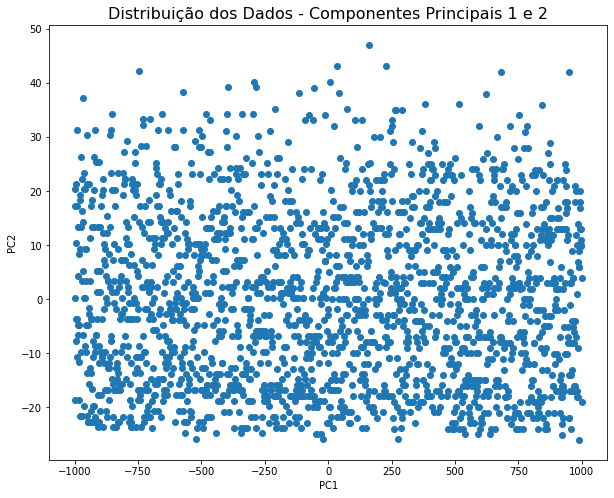

In [ ]:
# Biblioteca para pré processamento dos dados
from sklearn.decomposition import PCA

# Aplica PCA para uma melhor visualização dos dados
pca_data = PCA(n_components = 2).fit_transform(df_renomeado_dummies)

# Plota os dados em relação às duas componentes
plt.figure(figsize = (10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribuição dos Dados - Componentes Principais 1 e 2', size = 16)


## df_ideologia predict_proba

In [ ]:
# for i in range(2,10):
#   clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=i)
#   clf = clf.fit(X_train, y_train)
#   print('max_leaf_nodes: ' + str(i) + " auc:" + str(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])))
#   print('max_leaf_nodes: ' + str(i) + " auc:" + str(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_renomeado_dummies.drop(columns='VAI_VACINAR'), df_renomeado_dummies['VAI_VACINAR'], test_size=0.3, random_state=42)

In [ ]:
columns_to_keep = ['VOTO_CIRO', 'VOTO_HADDAD', 'VOTO_LULA', 'VOTO_HUCK', 'VOTO_BOLSONARO', 'VOTO_DORIA', 'VOTO_MORO', 'VOTO_MANDETTA', 'VOTO_BOULOS', 'VOTO_MARINA']
X_train_ideo = X_train[columns_to_keep]
X_test_ideo = X_test[columns_to_keep]

In [ ]:
# fits rfc
#X_train, X_test, y_train, y_test = train_test_split(df_ideologia.drop(columns='VAI_VACINAR'), df_ideologia['VAI_VACINAR'], test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_leaf_nodes=7,max_depth=3)
rfc = rfc.fit(X_train_ideo, y_train)
print('[Train] AUC ROC Score: ' + str(roc_auc_score(y_train, rfc.predict_proba(X_train_ideo)[:,1])))
print('[Test] AUC ROC Score: ' + str(roc_auc_score(y_test, rfc.predict_proba(X_test_ideo)[:,1])))

# concat predict proba to train/test data
X_train['score_ideologia'] = rfc.predict_proba(X_train_ideo)[:,1]
X_test['score_ideologia'] = rfc.predict_proba(X_test_ideo)[:,1]

# append test data to train data - this way we can have a single dataframe in order to sort and join
#X_train.append(X_test_ideo)
#X_train.sort_index(inplace=True)

# copy dataframe
#df_renomeado_tratado = df_renomeado.copy()
#df_renomeado_dummies_tratado = df_renomeado_dummies.copy()

# drop the columns that we won't need anymore
#columns_to_drop = ['VOTO_CIRO', 'VOTO_HADDAD', 'VOTO_LULA', 'VOTO_HUCK', 'VOTO_BOLSONARO', 'VOTO_DORIA', 'VOTO_MORO', 'VOTO_MANDETTA', 'VOTO_BOULOS', 'VOTO_MARINA']
#df_renomeado_tratado.drop(columns=columns_to_drop, inplace=True)
#df_renomeado_dummies_tratado.drop(columns=columns_to_drop, inplace=True)

# join the predict proba column
#df_renomeado_tratado['predict_proba'] = X_train['predict_proba']
#df_renomeado_dummies_tratado['predict_proba'] = X_train['predict_proba']

[Train] AUC ROC Score: 0.637228551395595
[Test] AUC ROC Score: 0.6051475588195294


32
0.6124575003399972


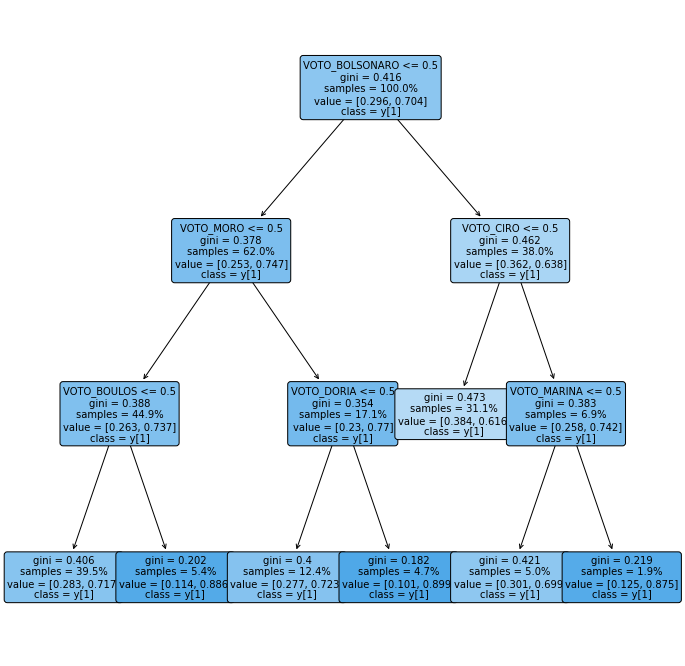

In [ ]:
auc_arvores=[]
for i in range(len(rfc.estimators_)):
  #print(i)
  aux=rfc.estimators_[i]
  aux2=roc_auc_score(y_test, aux.predict_proba(X_test_ideo)[:,1])
  auc_arvores.append(aux2)

arvore_escolhida=np.argmax(auc_arvores)
print(arvore_escolhida)
print(max(auc_arvores))
# plot
from sklearn import tree

plt.figure(figsize=(12, 12))
tree.plot_tree(rfc.estimators_[arvore_escolhida], fontsize=10, rounded=True, filled=True, feature_names=X_train_ideo.columns,proportion=True,class_names=True)
plt.show()

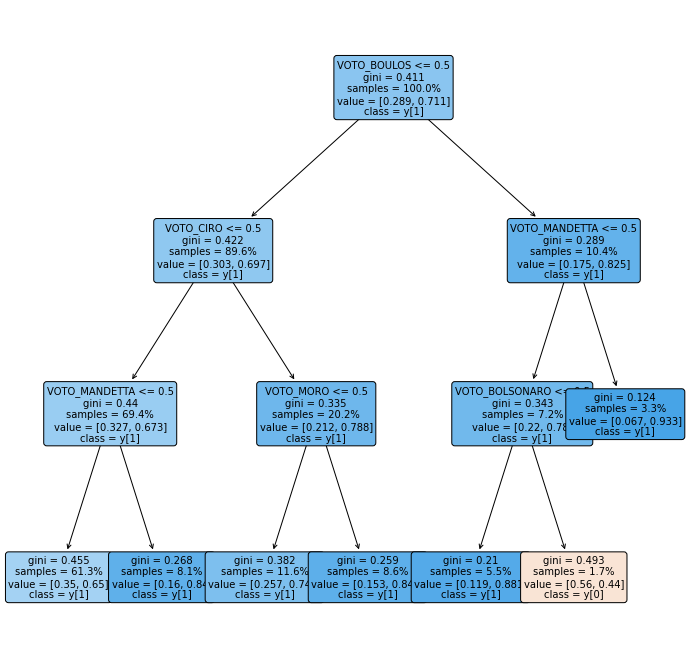

In [ ]:
plt.figure(figsize=(12, 12))
tree.plot_tree(rfc.estimators_[40], fontsize=10, rounded=True, filled=True, feature_names=X_train_ideo.columns,proportion=True,class_names=True)
plt.show()

VACINA_SEGURA
TRAT_MAIS_EFIC
MUDA_DNA
MICROCHIP
CANCER_AUT_HIV
ABORTADOS_E_TUMORES
APROVA_GOVERNO
CONFIA_BOLSONARO
FXIDADE
SEXO
ESCOLARIDADE
RELIGIAO
RENDA_PESSOAL
REG
RENDA_FAMILIAR


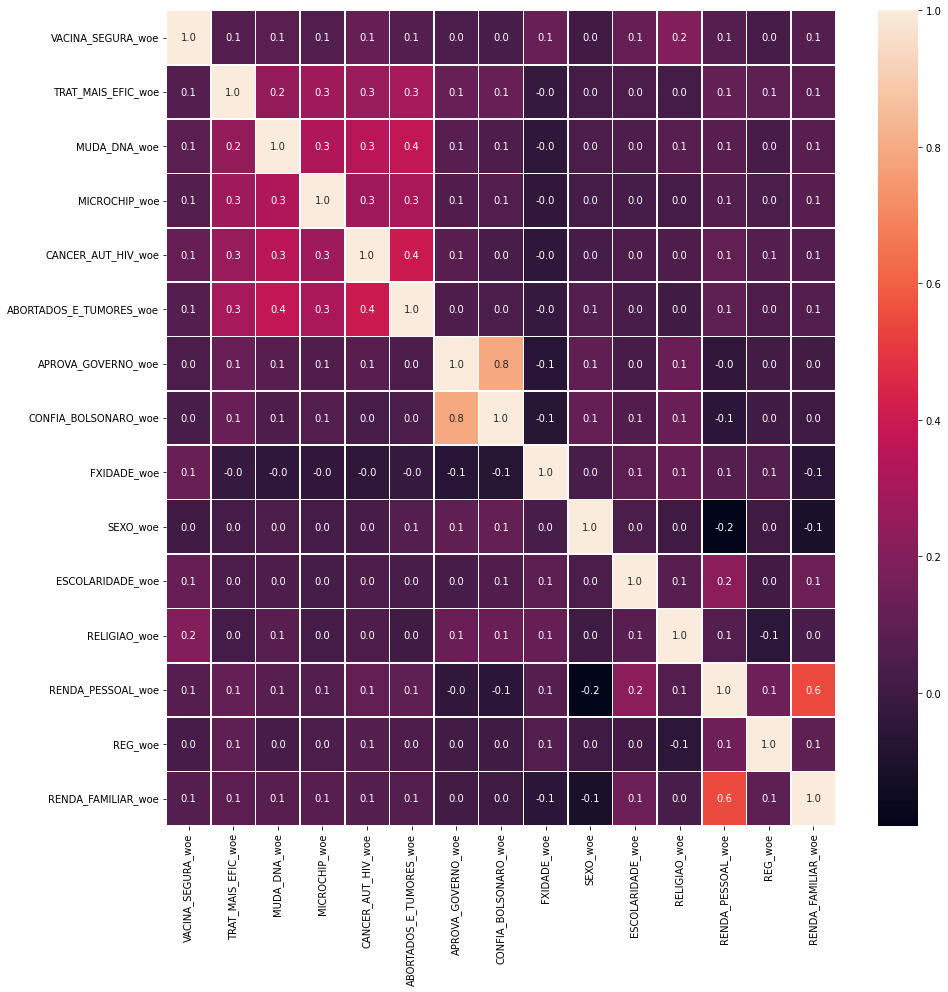

In [ ]:
cols_woe=[]
result=df_renomeado.copy()

df_avaliacao_governo_woe
df_perfil_woe


cols_aux = df_opiniao_vacina_woe["Variable"].drop_duplicates()
for i in cols_aux:
  aux = df_opiniao_vacina_woe.query("Variable=='{}'".format(i))[["Value","WoE"]]
  aux.columns=["Value",i+"_woe"]
  cols_woe.append(i+"_woe")
  #print(df_renomeado[i])
  #print(aux["Value"])
  print(i)
  result = pd.merge(result, aux, left_on=i, right_on="Value", how="outer")

cols_aux = df_avaliacao_governo_woe["Variable"].drop_duplicates()
for i in cols_aux:
  aux = df_avaliacao_governo_woe.query("Variable=='{}'".format(i))[["Value","WoE"]]
  aux.columns=["Value",i+"_woe"]
  cols_woe.append(i+"_woe")
  #print(df_renomeado[i])
  #print(aux["Value"])
  print(i)
  result = pd.merge(result, aux, left_on=i, right_on="Value", how="outer")

cols_aux = df_perfil_woe["Variable"].drop_duplicates()
for i in cols_aux:
  aux = df_perfil_woe.query("Variable=='{}'".format(i))[["Value","WoE"]]
  aux.columns=["Value",i+"_woe"]
  cols_woe.append(i+"_woe")
  #print(df_renomeado[i])
  #print(aux["Value"])
  print(i)
  result = pd.merge(result, aux, left_on=i, right_on="Value", how="outer")


correlation = correlation = result[cols_woe].corr()

plt.figure(figsize=(15,15))

sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)


In [ ]:
X_train.columns

Index(['Unnamed: 0', 'IDADE', 'VOTO_CIRO', 'VOTO_HADDAD', 'VOTO_LULA',
       'VOTO_HUCK', 'VOTO_BOLSONARO', 'VOTO_DORIA', 'VOTO_MORO',
       'VOTO_MANDETTA', 'VOTO_BOULOS', 'VOTO_MARINA', 'APROVA_GOVERNO',
       'CONFIA_BOLSONARO', 'VACINA_SEGURA', 'TRAT_MAIS_EFIC', 'MUDA_DNA',
       'MICROCHIP', 'CANCER_AUT_HIV', 'ABORTADOS_E_TUMORES', 'FXIDADE_29_A_41',
       'FXIDADE_42_A_54', 'FXIDADE_54_MAIS', 'SEXO_MAS', 'ALFABETIZACAO_SIM',
       'ESCOLARIDADE_FUNDAMENTAL_1', 'ESCOLARIDADE_FUNDAMENTAL_2',
       'ESCOLARIDADE_SUPERIOR_COMPLETO', 'ESCOLARIDADE_SUPERIOR_INCOMPLETO',
       'RELIGIAO_AGNOSTICO', 'RELIGIAO_ATEU', 'RELIGIAO_CATOLICA',
       'RELIGIAO_ESPIRITA', 'RELIGIAO_EVANGELICA', 'RELIGIAO_N/A',
       'RELIGIAO_OUTRAS', 'RENDA_PESSOAL_2_A_5', 'RENDA_PESSOAL_5_MAIS',
       'RENDA_PESSOAL_ATE_1', 'RENDA_PESSOAL_N/A',
       'RENDA_PESSOAL_SEM_RENDA_PESSOAL', 'RENDA_FAMILIAR_2_A_5',
       'RENDA_FAMILIAR_5_MAIS', 'RENDA_FAMILIAR_ATE_1', 'RENDA_FAMILIAR_N/A',
       'REG_NO

## Feature importance

In [ ]:
# train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_renomeado_dummies_tratado.drop(columns=['IDADE','VAI_VACINAR']), df_renomeado_dummies_tratado['VAI_VACINAR'], test_size=0.3, random_state=42)
columns_to_drop= ['VOTO_CIRO', 'VOTO_HADDAD', 'VOTO_LULA', 'VOTO_HUCK', 'VOTO_BOLSONARO',
                  'VOTO_DORIA', 'VOTO_MORO', 'VOTO_MANDETTA', 'VOTO_BOULOS', 'VOTO_MARINA','IDADE','CONFIA_BOLSONARO',
                  'RENDA_FAMILIAR_2_A_5','RENDA_FAMILIAR_5_MAIS', 'RENDA_FAMILIAR_ATE_1', 'RENDA_FAMILIAR_N/A']

X_train_trat = X_train.drop(columns=columns_to_drop,inplace=False)
X_test_trat = X_test.drop(columns=columns_to_drop,inplace=False)


Text(0.5, 0, 'Feature Importance')

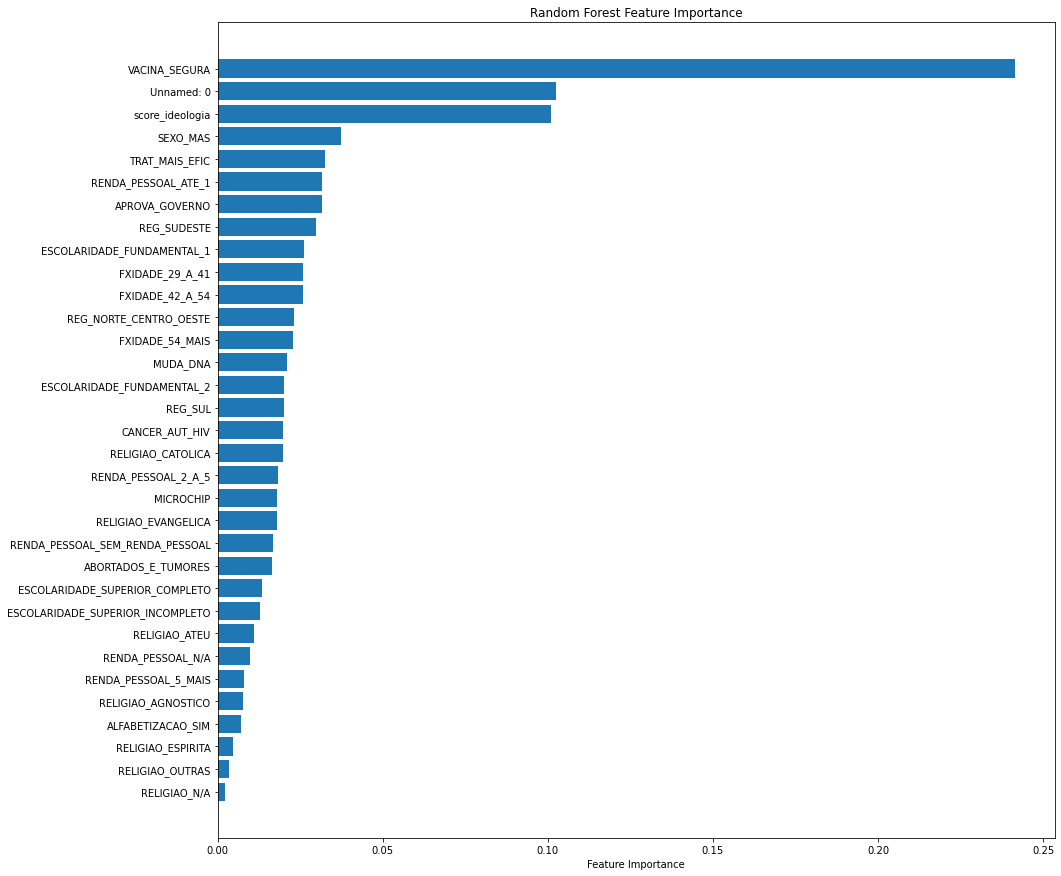

In [ ]:
etc = ExtraTreesClassifier(n_estimators=100)
etc = etc.fit(X_train_trat, y_train)
etc.feature_importances_
sorted_idx = etc.feature_importances_.argsort()
plt.figure(figsize=(15,15))
plt.barh(X_train_trat.columns[sorted_idx], etc.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Importance")

#VACINA SEGURA
#score_ideologia
#SEXO_MASC
#TRAT_MAIS_EFIC
#RENDA PESSOAL
#APROVA_GOVERNO
#REG
#FXIDADE
#ESCOLARIDADE
#Religiao

## Step forward

In [ ]:
#forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1), n_features_to_select=10, direction='forward', scoring='roc_auc')
#fselector = forward_feature_selector.fit(X_train, y_train)
#fselector.get_feature_names_out()

## Step backawrd

In [ ]:
#backward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1), n_features_to_select=10, direction='backward', scoring='roc_auc')
#bselector = backward_feature_selector.fit(X_train, y_train)
#bselector.get_feature_names_out()

# Classification Model

In [ ]:
#VACINA SEGURA
#score_ideologia
#SEXO_MASC
#TRAT_MAIS_EFIC
#REG
#FXIDADE
#APROVA_GOVERNO
#ESCOLARIDADE

In [ ]:
X_train_trat.columns

Index(['Unnamed: 0', 'APROVA_GOVERNO', 'VACINA_SEGURA', 'TRAT_MAIS_EFIC',
       'MUDA_DNA', 'MICROCHIP', 'CANCER_AUT_HIV', 'ABORTADOS_E_TUMORES',
       'FXIDADE_29_A_41', 'FXIDADE_42_A_54', 'FXIDADE_54_MAIS', 'SEXO_MAS',
       'ALFABETIZACAO_SIM', 'ESCOLARIDADE_FUNDAMENTAL_1',
       'ESCOLARIDADE_FUNDAMENTAL_2', 'ESCOLARIDADE_SUPERIOR_COMPLETO',
       'ESCOLARIDADE_SUPERIOR_INCOMPLETO', 'RELIGIAO_AGNOSTICO',
       'RELIGIAO_ATEU', 'RELIGIAO_CATOLICA', 'RELIGIAO_ESPIRITA',
       'RELIGIAO_EVANGELICA', 'RELIGIAO_N/A', 'RELIGIAO_OUTRAS',
       'RENDA_PESSOAL_2_A_5', 'RENDA_PESSOAL_5_MAIS', 'RENDA_PESSOAL_ATE_1',
       'RENDA_PESSOAL_N/A', 'RENDA_PESSOAL_SEM_RENDA_PESSOAL',
       'REG_NORTE_CENTRO_OESTE', 'REG_SUDESTE', 'REG_SUL', 'score_ideologia'],
      dtype='object')

In [ ]:
# train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_renomeado_dummies_tratado.drop(columns=['IDADE','VAI_VACINAR']), df_renomeado_dummies_tratado['VAI_VACINAR'], test_size=0.3, random_state=42)
columns_to_keep= ['APROVA_GOVERNO', 'VACINA_SEGURA', 'TRAT_MAIS_EFIC',
       'FXIDADE_29_A_41','FXIDADE_42_A_54', 'FXIDADE_54_MAIS', 'SEXO_MAS',
       'ESCOLARIDADE_FUNDAMENTAL_1', 'ESCOLARIDADE_FUNDAMENTAL_2',
       'ESCOLARIDADE_SUPERIOR_COMPLETO', 'ESCOLARIDADE_SUPERIOR_INCOMPLETO',
       'RELIGIAO_AGNOSTICO', 'RELIGIAO_ATEU', 'RELIGIAO_CATOLICA',
       'RELIGIAO_ESPIRITA', 'RELIGIAO_EVANGELICA', 'RELIGIAO_N/A',
       'RELIGIAO_OUTRAS', 'RENDA_PESSOAL_2_A_5', 'RENDA_PESSOAL_5_MAIS',
       'RENDA_PESSOAL_ATE_1', 'RENDA_PESSOAL_N/A',
       'RENDA_PESSOAL_SEM_RENDA_PESSOAL', 'REG_NORTE_CENTRO_OESTE',
       'REG_SUDESTE', 'REG_SUL', 'score_ideologia']

X_train_final = X_train_trat[columns_to_keep]
X_test_final = X_test_trat[columns_to_keep]

In [ ]:
# fits rfc
#X_train, X_test, y_train, y_test = train_test_split(df_ideologia.drop(columns='VAI_VACINAR'), df_ideologia['VAI_VACINAR'], test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_leaf_nodes=7,max_depth=3)
rfc = rfc.fit(X_train_final, y_train)
print('[Train] AUC ROC Score: ' + str(roc_auc_score(y_train, rfc.predict_proba(X_train_final)[:,1])))
print('[Test] AUC ROC Score: ' + str(roc_auc_score(y_test, rfc.predict_proba(X_test_final)[:,1])))


[Train] AUC ROC Score: 0.8427810956901395
[Test] AUC ROC Score: 0.8631510947912415


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
print('[Train] Precision Score: ' + str(precision_score(y_train, (rfc.predict(X_train_final)))))
print('[Test]  Precision Score: ' + str(precision_score(y_test, (rfc.predict(X_test_final)))))
print('[Train] Recall Score: ' + str(recall_score(y_train, (rfc.predict(X_train_final)))))
print('[Test]  Recall Score: ' + str(recall_score(y_test, (rfc.predict(X_test_final)))))
print("[Train]  Confusion Matrix")
print(confusion_matrix(y_train, (rfc.predict(X_train_final))))
print("[Test]  Confusion Matrix")
print(confusion_matrix(y_test, (rfc.predict(X_test_final))))

[Train] Precision Score: 0.746031746031746
[Test]  Precision Score: 0.7615658362989324
[Train] Recall Score: 0.9889779559118237
[Test]  Recall Score: 0.9953488372093023
[Train]  Confusion Matrix
[[ 67 336]
 [ 11 987]]
[Test]  Confusion Matrix
[[ 37 134]
 [  2 428]]


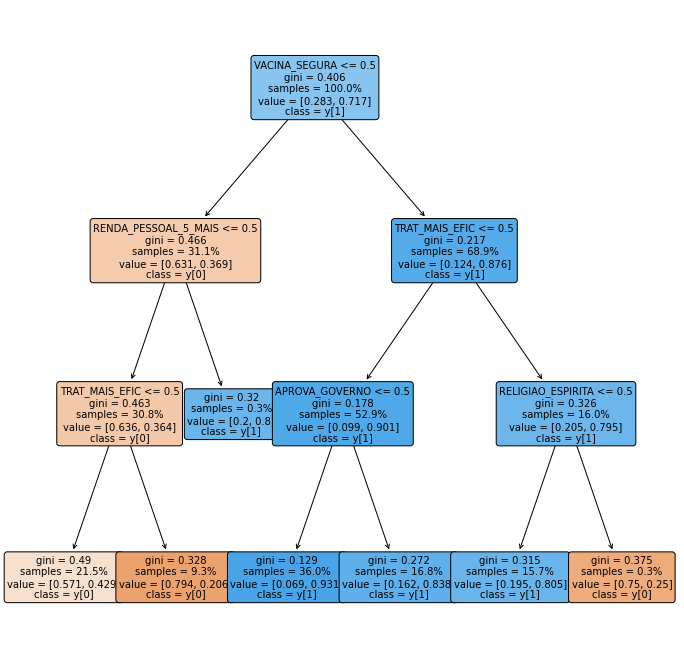

In [ ]:
auc_arvores=[]
for i in range(len(rfc.estimators_)):
  #print(i)
  aux=rfc.estimators_[i]
  aux2=roc_auc_score(y_test, aux.predict_proba(X_test_final)[:,1])
  auc_arvores.append(aux2)

arvore_escolhida=np.argmax(auc_arvores)
#print(arvore_escolhida)
#print(max(auc_arvores))
# plot
from sklearn import tree

plt.figure(figsize=(12, 12))
tree.plot_tree(rfc.estimators_[arvore_escolhida], fontsize=10, rounded=True, filled=True, feature_names=X_train_final.columns,proportion=True,class_names=True)
plt.show()

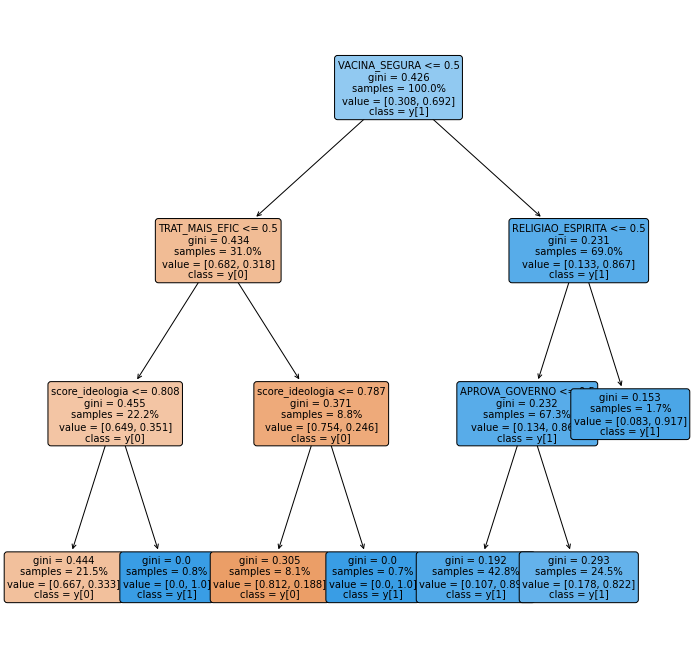

In [ ]:
plt.figure(figsize=(12, 12))
tree.plot_tree(rfc.estimators_[77], fontsize=10, rounded=True, filled=True, feature_names=X_train_final.columns,proportion=True,class_names=True)
plt.show()